In [3]:
import pandas as pd

# Load the datasets
data_path = r"C:\Users\user\Desktop\10 Academy- Machine-Learning\10 Academy W6\data\data.csv"
variable_definitions_path = r"C:\Users\user\Desktop\10 Academy- Machine-Learning\10 Academy W6\data\Xente_Variable_Definitions.csv"

df = pd.read_csv(data_path)  # Loading the main dataset
variable_definitions = pd.read_csv(variable_definitions_path)  # Loading the variable definitions

# Display the first few rows of the datasets to verify
print(df.head())
print(variable_definitions.head())

# Step 1: Feature Selection (Excluding irrelevant columns)
features = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'PricingStrategy', 'TransactionStartTime']
X = df[features]
y = df['FraudResult']

# Now continue with the rest of the modeling steps...


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [ ]:
Splitting the Data

In [10]:
# Check the column names in the dataset
print(df.columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


In [11]:
# Features and target variable
X = df.drop('FraudResult', axis=1)  # Drop the target column to create features
y = df['FraudResult']  # Set the target variable

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split completed:")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Data split completed:
Training set size: 76529 rows
Testing set size: 19133 rows


In [ ]:
2. Choosing Models
We choose Logistic Regression and Random Forest for modeling.

In [13]:
print(X_train.info())  # This will show the data types of each column


<class 'pandas.core.frame.DataFrame'>
Index: 76529 entries, 59096 to 15795
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         76529 non-null  object 
 1   BatchId               76529 non-null  object 
 2   AccountId             76529 non-null  object 
 3   SubscriptionId        76529 non-null  object 
 4   CustomerId            76529 non-null  object 
 5   CurrencyCode          76529 non-null  object 
 6   CountryCode           76529 non-null  int64  
 7   ProviderId            76529 non-null  object 
 8   ProductId             76529 non-null  object 
 9   ProductCategory       76529 non-null  object 
 10  ChannelId             76529 non-null  object 
 11  Amount                76529 non-null  float64
 12  Value                 76529 non-null  int64  
 13  TransactionStartTime  76529 non-null  object 
 14  PricingStrategy       76529 non-null  int64  
dtypes: float64(1), int64

In [14]:
columns_to_drop = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 
                   'CustomerId', 'ProviderId', 'TransactionStartTime']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)


In [15]:
# Define columns to encode
categorical_columns = ['CurrencyCode', 'ProductId', 'ProductCategory', 'ChannelId']

# Apply one-hot encoding
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align train and test data (in case encoding creates extra columns)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [16]:
print(X_train.info())
print(X_test.info())


<class 'pandas.core.frame.DataFrame'>
Index: 76529 entries, 59096 to 15795
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CountryCode                         76529 non-null  int64  
 1   Amount                              76529 non-null  float64
 2   Value                               76529 non-null  int64  
 3   PricingStrategy                     76529 non-null  int64  
 4   ProductId_ProductId_10              76529 non-null  bool   
 5   ProductId_ProductId_11              76529 non-null  bool   
 6   ProductId_ProductId_12              76529 non-null  bool   
 7   ProductId_ProductId_13              76529 non-null  bool   
 8   ProductId_ProductId_14              76529 non-null  bool   
 9   ProductId_ProductId_15              76529 non-null  bool   
 10  ProductId_ProductId_16              76529 non-null  bool   
 11  ProductId_ProductId_19              76529 

In [17]:
# Convert all boolean columns to int in both X_train and X_test
X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int64' for col in X_test.select_dtypes('bool').columns})

# Verify data type consistency
print(X_train.dtypes)
print(X_test.dtypes)


CountryCode                             int64
Amount                                float64
Value                                   int64
PricingStrategy                         int64
ProductId_ProductId_10                  int64
ProductId_ProductId_11                  int64
ProductId_ProductId_12                  int64
ProductId_ProductId_13                  int64
ProductId_ProductId_14                  int64
ProductId_ProductId_15                  int64
ProductId_ProductId_16                  int64
ProductId_ProductId_19                  int64
ProductId_ProductId_2                   int64
ProductId_ProductId_20                  int64
ProductId_ProductId_21                  int64
ProductId_ProductId_22                  int64
ProductId_ProductId_23                  int64
ProductId_ProductId_24                  int64
ProductId_ProductId_27                  int64
ProductId_ProductId_3                   int64
ProductId_ProductId_4                   int64
ProductId_ProductId_5             

In [18]:
assert list(X_train.columns) == list(X_test.columns), "Column names don't match!"


In [19]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (76529, 37)
X_test shape: (19133, 37)


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = model.predict(X_test)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier with a fixed random_state
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.97      0.92      0.94        36

    accuracy                           1.00     19133
   macro avg       0.99      0.96      0.97     19133
weighted avg       1.00      1.00      1.00     19133



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the RandomForestClassifier with class_weight='balanced'
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Final Accuracy: {accuracy}")
print("Classification Report:")
print(report)



Final Accuracy: 0.9935190508545445
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19097
           1       0.22      0.97      0.36        36

    accuracy                           0.99     19133
   macro avg       0.61      0.98      0.68     19133
weighted avg       1.00      0.99      1.00     19133



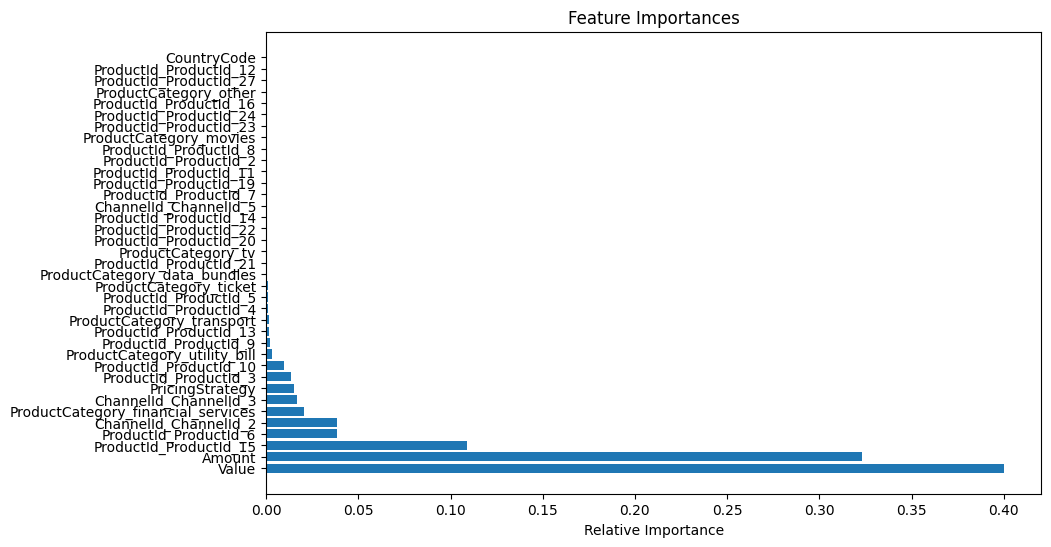

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_test.shape[1]), importances[indices], align="center")
plt.yticks(range(X_test.shape[1]), X_test.columns[indices])
plt.xlabel("Relative Importance")
plt.show()


In [26]:
import joblib

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

Number of features in df: 16
Length of importances array: 37
Mismatch between importances length and number of features in df.
Adjusted importances length: 16
Indices for top 10 features: [ 2  1  9  3  4  7 14 13 15  8]
Top 10 features: ['AccountId', 'BatchId', 'ProductCategory', 'SubscriptionId', 'CustomerId', 'ProviderId', 'PricingStrategy', 'TransactionStartTime', 'FraudResult', 'ProductId']


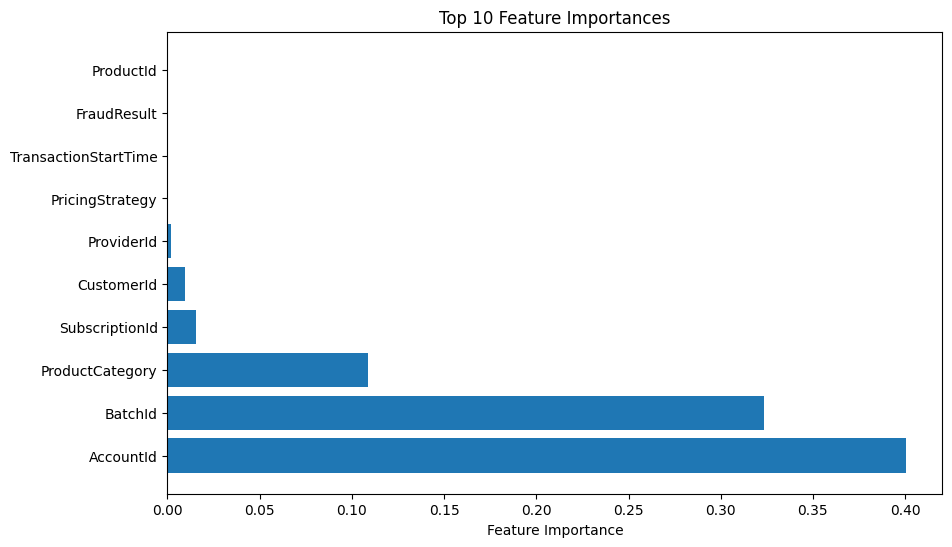

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Number of features in your dataframe
num_features_in_df = len(df.columns)  # Get the number of columns in the dataframe
print(f"Number of features in df: {num_features_in_df}")

# Ensure 'importances' has the same length as the number of features in the dataframe
print(f"Length of importances array: {len(importances)}")

# If importances length doesn't match the number of features, we need to adjust
if len(importances) != num_features_in_df:
    print("Mismatch between importances length and number of features in df.")
    
    # Adjust importances to match the number of features in df
    importances = importances[:num_features_in_df]  # Take only the first 'num_features_in_df' importances
    print(f"Adjusted importances length: {len(importances)}")

# Step 1: Limit top_n to the number of features available
top_n = min(top_n, num_features_in_df)  # Ensure we don't exceed the available features

# Step 2: Sort feature importances and get indices
indices = np.argsort(importances)[::-1]  # Sort importances in descending order
indices_to_plot = indices[:top_n]  # Get only top_n indices

# Debugging step: Check the indices and corresponding features
print(f"Indices for top {top_n} features: {indices_to_plot}")
print(f"Top {top_n} features: {[df.columns[i] for i in indices_to_plot]}")

# Step 3: Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[indices_to_plot], align="center")
plt.yticks(range(top_n), [df.columns[i] for i in indices_to_plot])  # Correctly match features to indices
plt.title(f"Top {top_n} Feature Importances")
plt.xlabel("Feature Importance")
plt.show()
